# Produce sliding window diagrams

In [38]:
%run ../sys_configs.ipynb

Diagrams for the 2 sliding window techniques introduced in the project workbooks. We generate a random walk time series in order to display the window technique.

In [28]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(123)

In [154]:
# Generate a random walk time series
T = 1000 # Time series length
random_walk = np.cumsum(np.random.randn(T))

In [161]:
# Define the sliding window parameters
window_size = 100 # For the overlapping sliding window approach
max_window_size = 450 # For the cumulative overlapping sliding window approach
num_shown_subplots = 7
total_windows = 20 
overlap = 0.5
step_size = int(window_size * (1 - overlap))  # 50% overlap

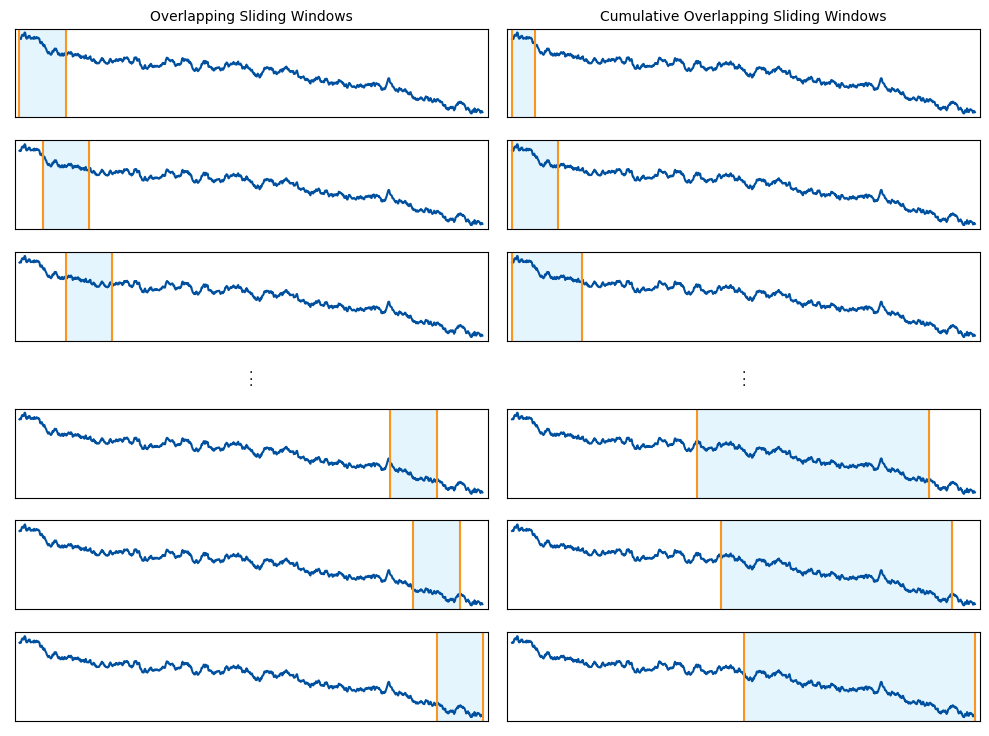

In [174]:
# Create a figure and subplots
fig, axs = plt.subplots(nrows = num_shown_subplots, ncols = 2, figsize=(10, 7.5), gridspec_kw=dict(height_ratios=[4, 4, 4, 1, 4, 4, 4]), sharex=True)

#
# Plot 1: Overlapping Sliding Windows
#

# Plot the random walk and sliding windows
for i in range(num_shown_subplots):
    if i == num_shown_subplots // 2:
        # Middle subplot for "..."
        axs[i][0].text(0.5, 0.5, '.\n.\n.', horizontalalignment='center', verticalalignment='center', linespacing = 0.32, fontsize=10, transform=axs[i][0].transAxes)
        
        # Hide the axis
        axs[i][0].axis("off")
    else:
        # Adjust index to skip the middle part
        idx = i if i < num_shown_subplots // 2 else total_windows - (num_shown_subplots - i) - 1
        
        start = idx * step_size
        end = idx * step_size + window_size
        axs[i][0].plot(random_walk, color = scale_rgb(COLOURS["primary-color"]),)
        
        # Highlight the beginning, end and body of the sliding window
        axs[i][0].axvline(x=start, color = scale_rgb(COLOURS["accent-orange"]), linestyle='-')
        axs[i][0].axvline(x=end, color = scale_rgb(COLOURS["accent-orange"]), linestyle='-')
        axs[i][0].axvspan(start, end, color = scale_rgb(COLOURS["accent-blue-light-1"]), alpha=0.3)
    
    # Hide x and y ticks
    axs[i][0].set_xticks([])
    axs[i][0].set_yticks([])
    axs[i][0].set_xlim([0 - 10,T + 10])
    
#
# Plot 2: Cumulative Overlapping Sliding Windows
#

# Plot the random walk and sliding windows
for i in range(num_shown_subplots):
    if i == num_shown_subplots // 2:
        # Middle subplot for "..."
        axs[i][1].text(0.5, 0.5, '.\n.\n.', horizontalalignment='center', verticalalignment='center', linespacing = 0.32, fontsize=10, transform=axs[i][1].transAxes)
        
        # Hide the axis
        axs[i][1].axis("off")
    else:
        # Adjust index to skip the middle part
        idx = i if i < num_shown_subplots // 2 else total_windows - (num_shown_subplots - i)
        
        start = max(idx * step_size - max_window_size, 0)
        end = (idx - 1) * step_size + window_size
        axs[i][1].plot(random_walk, color = scale_rgb(COLOURS["primary-color"]))
        
        # Highlight the beginning, end and body of the sliding window
        axs[i][1].axvline(x=start, color=scale_rgb(COLOURS["accent-orange"]), linestyle='-')
        axs[i][1].axvline(x=end, color=scale_rgb(COLOURS["accent-orange"]), linestyle='-')
        axs[i][1].axvspan(start, end, color=scale_rgb(COLOURS["accent-blue-light-1"]), alpha=0.3)
    
    # Hide x and y ticks
    axs[i][1].set_xticks([])
    axs[i][1].set_yticks([])
    axs[i][1].set_xlim([0 - 10,T + 10])
    
fig.tight_layout()
fig.subplots_adjust(top=0.95)    
axs[0, 0].set_title("Overlapping Sliding Windows", fontsize = 10)
axs[0, 1].set_title("Cumulative Overlapping Sliding Windows", fontsize = 10)
plt.show()
